In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from helpers import *


wikiurl = "https://commons.wikimedia.org/wiki/Data:Ncei.noaa.gov/weather/Boston.tab"
data = get_dataframe(wikiurl)

# drop the unwanted columns
data.drop(["precip", "precipDays"], axis=1, inplace = True)
data.drop(range(226), axis = 0, inplace = True)

/home/brookem/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [2]:
dates_series = pd.Series(data.date.values.flatten())

data['date'] = convert_year(dates_series.str.split('-'))

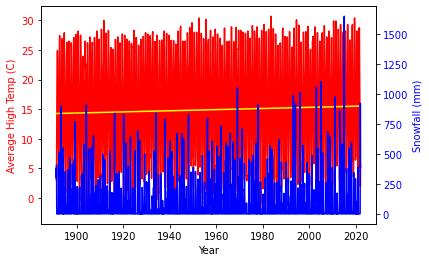

In [3]:
plot_double_scatter(data['date'], data['avgHighTemp'], data['snowfall'], \
    y_label1='Average High Temp (C)', y_label2='Snowfall (mm)', fit='first')

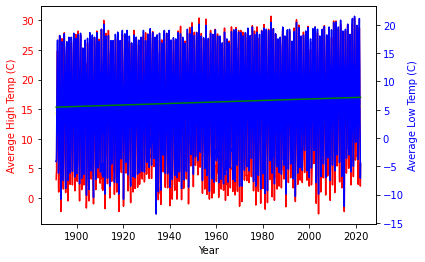

In [4]:
plot_double_scatter(data['date'], data['avgHighTemp'], data['avgLowTemp'], \
                    y_label1='Average High Temp (C)', \
                    y_label2='Average Low Temp (C)', fit='both')